In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [2]:
num_rows = 45
num_columns = 130
num_channels = 1

num_epochs = 100
num_batch_size = 13
num_speakers = 5
name1 = 'A.J._Buckley'
name2 = 'Aaron_Tveit'
num_seconds = 3.0

In [3]:
featuresdf = data_load.make_dataframe_2speakers(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds, name1, name2)

./Dataset/wav/id10001\1zcIwhmdeo4\00001.wav
Yes
./Dataset/wav/id10001\1zcIwhmdeo4\00002.wav
Yes
./Dataset/wav/id10001\1zcIwhmdeo4\00003.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00001.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00002.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00003.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00004.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00001.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00002.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00003.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00004.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00005.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00006.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00007.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00008.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00009.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00010.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00001.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00002.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00003.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00004.

./Dataset/wav/id10004\8mWxQ6DRO-U\00001.wav
Yes
./Dataset/wav/id10004\8mWxQ6DRO-U\00002.wav
Yes
./Dataset/wav/id10004\8mWxQ6DRO-U\00003.wav
Yes
./Dataset/wav/id10004\8mWxQ6DRO-U\00004.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00001.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00002.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00003.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00004.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00005.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00006.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00007.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00008.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00009.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00010.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00011.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00012.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00013.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00014.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00015.wav
Yes
./Dataset/wav/id10004\bIZQaEVuATQ\00016.wav
Yes
./Dataset/wav/id10004\BOAd7pybyZw\00001.

./Dataset/wav/id10009\VM8gJWbQsEY\00004.wav
./Dataset/wav/id10009\VM8gJWbQsEY\00005.wav
./Dataset/wav/id10009\vy8sQ82o0fM\00001.wav
./Dataset/wav/id10009\vy8sQ82o0fM\00002.wav
./Dataset/wav/id10009\vy8sQ82o0fM\00003.wav
./Dataset/wav/id10009\vy8sQ82o0fM\00004.wav
./Dataset/wav/id10009\vy8sQ82o0fM\00005.wav
./Dataset/wav/id10009\vy8sQ82o0fM\00006.wav
./Dataset/wav/id10009\vy8sQ82o0fM\00007.wav
./Dataset/wav/id10009\x_HdUZuSusA\00001.wav
./Dataset/wav/id10009\x_HdUZuSusA\00002.wav
./Dataset/wav/id10010\1O_m0G4rf9Q\00001.wav
./Dataset/wav/id10010\1O_m0G4rf9Q\00002.wav
./Dataset/wav/id10010\5ssVY9a5X-M\00001.wav
./Dataset/wav/id10010\5ssVY9a5X-M\00002.wav
./Dataset/wav/id10010\5ssVY9a5X-M\00003.wav
./Dataset/wav/id10010\5ssVY9a5X-M\00004.wav
./Dataset/wav/id10010\5ssVY9a5X-M\00005.wav
./Dataset/wav/id10010\5ssVY9a5X-M\00006.wav
./Dataset/wav/id10010\5xGZ4I9Bltc\00001.wav
./Dataset/wav/id10010\aVg9a5-hRsw\00001.wav
./Dataset/wav/id10010\E454T_sS_AM\00001.wav
./Dataset/wav/id10010\E454T_sS_A

In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

In [5]:
learn.compile(model)

In [6]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 129, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 63, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 30, 64)         8

In [7]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'CNN2Men', 'default', 'CNN2Men')

Train on 148 samples, validate on 37 samples
Epoch 1/100
143/148 [===========================>..] - ETA: 0s - loss: 3.3589 - accuracy: 0.5455
Epoch 00001: val_loss improved from inf to 0.85418, saving model to saved_models/weights.best.CNN2Men.hdf5
148/148 [==============================] - 2s 11ms/sample - loss: 3.3158 - accuracy: 0.5338 - val_loss: 0.8542 - val_accuracy: 0.5405
Epoch 2/100
143/148 [===========================>..] - ETA: 0s - loss: 1.2033 - accuracy: 0.5664
Epoch 00002: val_loss improved from 0.85418 to 0.68236, saving model to saved_models/weights.best.CNN2Men.hdf5
148/148 [==============================] - 1s 5ms/sample - loss: 1.1789 - accuracy: 0.5676 - val_loss: 0.6824 - val_accuracy: 0.5405
Epoch 3/100
143/148 [===========================>..] - ETA: 0s - loss: 1.0390 - accuracy: 0.6434
Epoch 00003: val_loss improved from 0.68236 to 0.63069, saving model to saved_models/weights.best.CNN2Men.hdf5
148/148 [==============================] - 1s 5ms/sample - loss: 1.0

143/148 [===========================>..] - ETA: 0s - loss: 0.2067 - accuracy: 0.9091
Epoch 00027: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.2025 - accuracy: 0.9122 - val_loss: 0.5827 - val_accuracy: 0.8649
Epoch 28/100
143/148 [===========================>..] - ETA: 0s - loss: 0.2263 - accuracy: 0.8881
Epoch 00028: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.2201 - accuracy: 0.8919 - val_loss: 0.5955 - val_accuracy: 0.8649
Epoch 29/100
130/148 [=========================>....] - ETA: 0s - loss: 0.2379 - accuracy: 0.9231
Epoch 00029: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.2597 - accuracy: 0.9122 - val_loss: 0.6064 - val_accuracy: 0.8378
Epoch 30/100
143/148 [===========================>..] - ETA: 0s - loss: 0.3138 - accuracy: 0.8531
Epoch 00030: val_loss did not improve from 0.48895
148/148 [=========

Epoch 56/100
143/148 [===========================>..] - ETA: 0s - loss: 0.1719 - accuracy: 0.9161
Epoch 00056: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.1669 - accuracy: 0.9189 - val_loss: 0.7991 - val_accuracy: 0.8649
Epoch 57/100
143/148 [===========================>..] - ETA: 0s - loss: 0.1340 - accuracy: 0.9301
Epoch 00057: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.1316 - accuracy: 0.9324 - val_loss: 0.9387 - val_accuracy: 0.8919
Epoch 58/100
143/148 [===========================>..] - ETA: 0s - loss: 0.1247 - accuracy: 0.9371
Epoch 00058: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.1263 - accuracy: 0.9324 - val_loss: 0.9825 - val_accuracy: 0.8649
Epoch 59/100
143/148 [===========================>..] - ETA: 0s - loss: 0.0673 - accuracy: 0.9720
Epoch 00059: val_loss did not improve from 0.48895
148/1

143/148 [===========================>..] - ETA: 0s - loss: 0.0478 - accuracy: 0.9790
Epoch 00085: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.0466 - accuracy: 0.9797 - val_loss: 1.0346 - val_accuracy: 0.9189
Epoch 86/100
143/148 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.9650
Epoch 00086: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.0740 - accuracy: 0.9662 - val_loss: 1.0068 - val_accuracy: 0.8919
Epoch 87/100
143/148 [===========================>..] - ETA: 0s - loss: 0.0443 - accuracy: 0.9790
Epoch 00087: val_loss did not improve from 0.48895
148/148 [==============================] - 1s 5ms/sample - loss: 0.0441 - accuracy: 0.9797 - val_loss: 1.1203 - val_accuracy: 0.8919
Epoch 88/100
143/148 [===========================>..] - ETA: 0s - loss: 0.0287 - accuracy: 0.9930
Epoch 00088: val_loss did not improve from 0.48895
148/148 [=========

In [8]:
evaluate.evaluate_model(model, 'CNN2Men', result_sets)

Training Accuracy:  0.8986486
Testing Accuracy:  0.8378378


In [9]:
evaluate.display_metrics(model, 'CNN2Men', result_sets)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.83      0.83      0.83        18

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37

Confusion matrix: 
[[16  3]
 [ 3 15]]


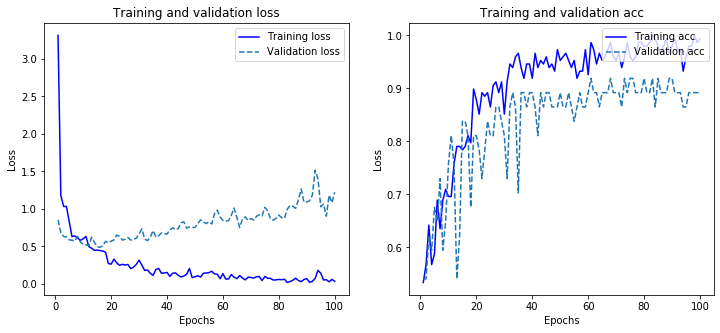

In [10]:
evaluate.plot_history(history)